In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [304]:
dataset=pd.read_csv("advertising.csv")

In [305]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


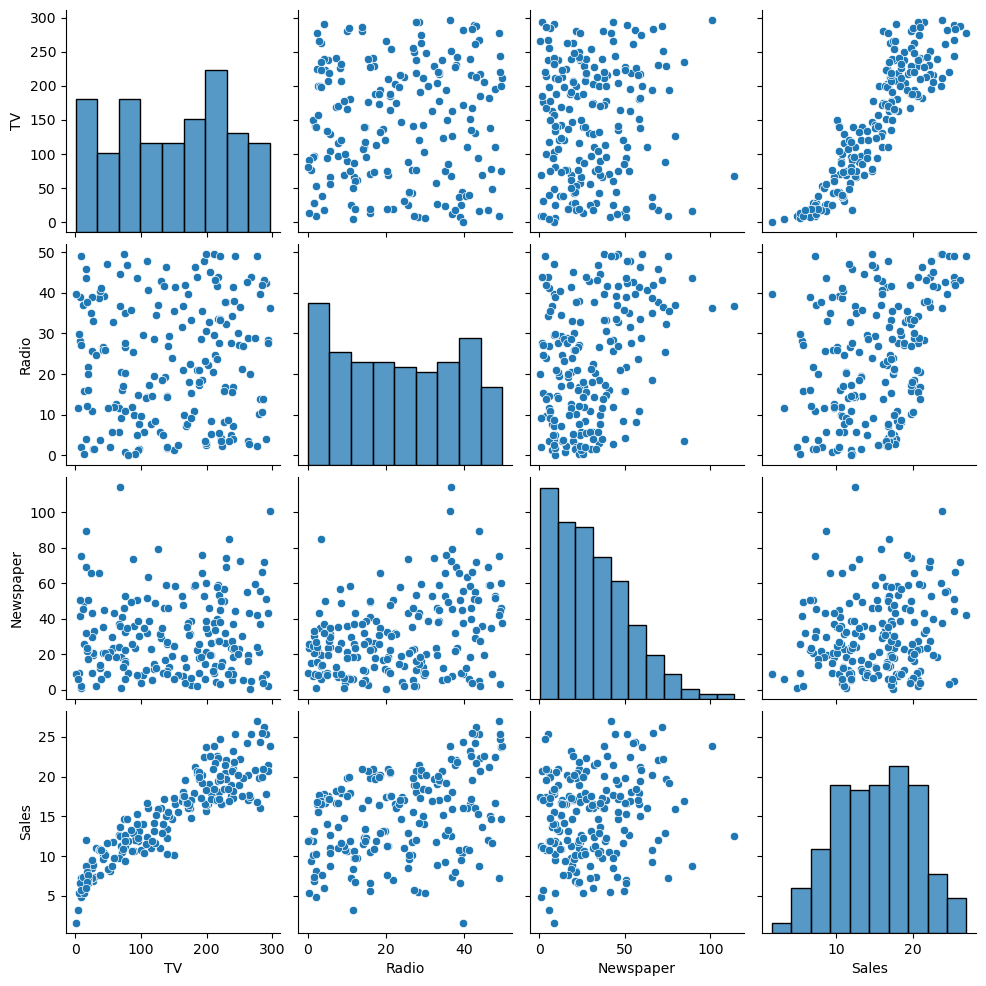

In [306]:
sns.pairplot(dataset)
plt.show()

# TV

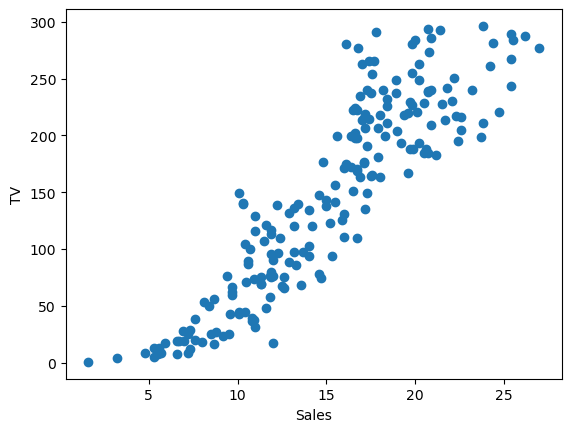

In [308]:
plt.plot(dataset["Sales"],dataset["TV"],'o')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()


In [309]:
df=dataset[['Sales','TV']]
df

,Sales,TV
0,22.1,230.1
1,10.4,44.5
2,12.0,17.2
3,16.5,151.5
4,17.9,180.8
...,...,...
195,7.6,38.2
196,14.0,94.2
197,14.8,177.0
198,25.5,283.6


In [310]:
x=dataset.Sales

y=dataset.TV


In [311]:
x=dataset.Sales.values.reshape(200,1)
y=dataset.TV.values.reshape(200,1)

In [312]:
print(x.shape)
print(y.shape)


(200, 1)
(200, 1)


In [313]:
X=np.hstack((x,(np.ones(x.shape))))

In [314]:
# découpage du dataset en dataset d'entrainement et dataset de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [315]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))


In [316]:
np.random.seed(0)
theta = np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [317]:
def model(X, theta):
    return X.dot(theta)

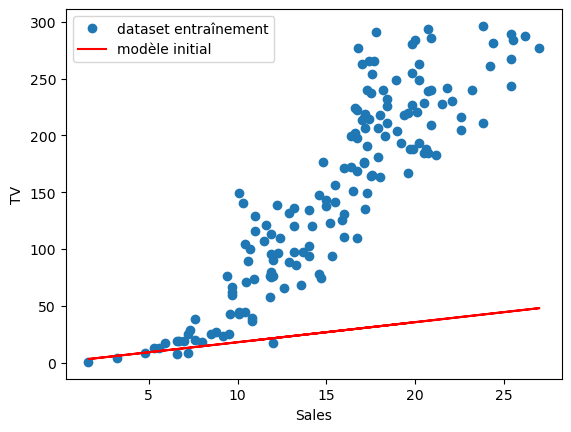

In [318]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.legend()
plt.show()



In [319]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [320]:
cost_function(X_train, y_train, theta)

10401.888695598023

In [321]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [322]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) 
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [323]:
n_iterations = 100000
learning_rate = 0.0003


theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
cost_history

array([8971.14491789, 7757.0459999 , 6726.78691841, ...,  661.08792578,
        661.08788638,  661.08784698])

In [324]:
theta_final

array([[ 14.45418653],
       [-71.21057916]])

In [325]:
theta_final[0]

array([14.45418653])

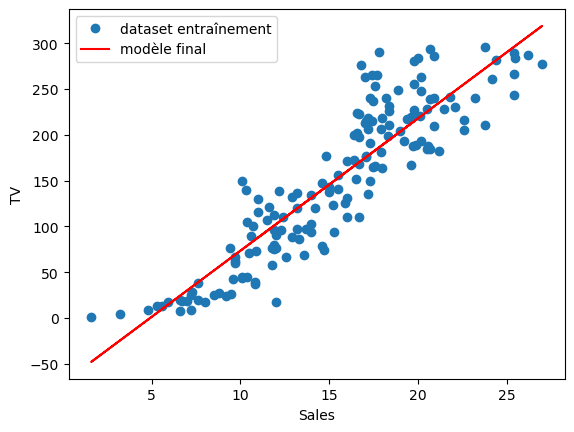

In [326]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.legend()
plt.show()

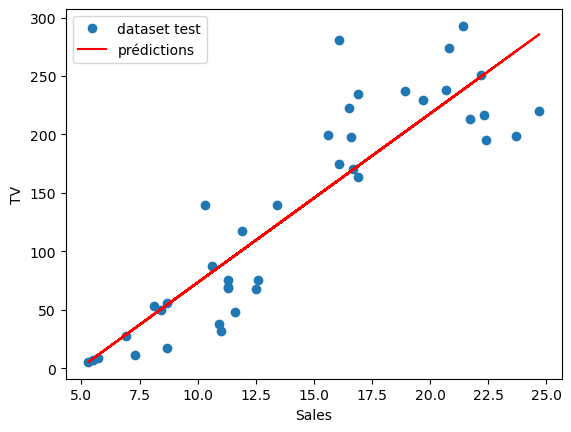

In [327]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.legend()
plt.show()

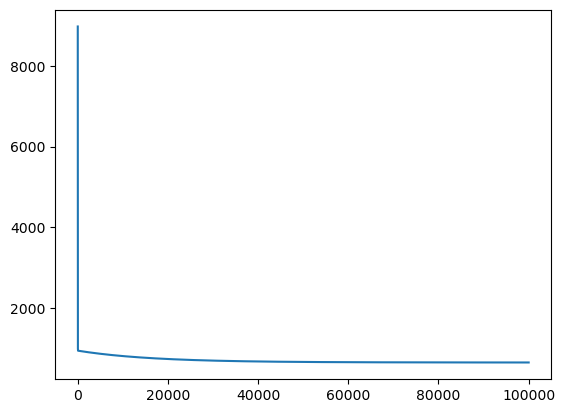

In [328]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [329]:
def coef_determination_Tv(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [330]:
cf_tv=coef_determination_Tv(y_test, predictions) 
print(cf_tv)

0.8034526072963976


# Radio

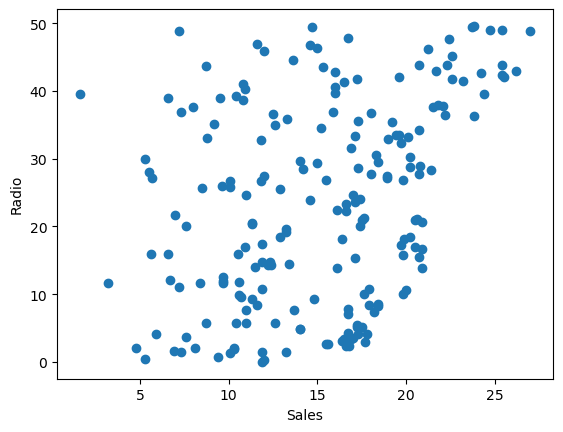

In [332]:
plt.plot(dataset["Sales"],dataset["Radio"],'o')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.show()

In [333]:
df=dataset[['Sales','Radio']]
df

,Sales,Radio
0,22.1,37.8
1,10.4,39.3
2,12.0,45.9
3,16.5,41.3
4,17.9,10.8
...,...,...
195,7.6,3.7
196,14.0,4.9
197,14.8,9.3
198,25.5,42.0


In [334]:
x=dataset.Sales
y=dataset.Radio

In [335]:
x=dataset.Sales.values.reshape(200,1)
y=dataset.Radio.values.reshape(200,1)

In [336]:
X=np.hstack((x,(np.ones(x.shape))))

In [337]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))

In [338]:
np.random.seed(0)
theta = np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [339]:
def model(X, theta):
    return X.dot(theta)

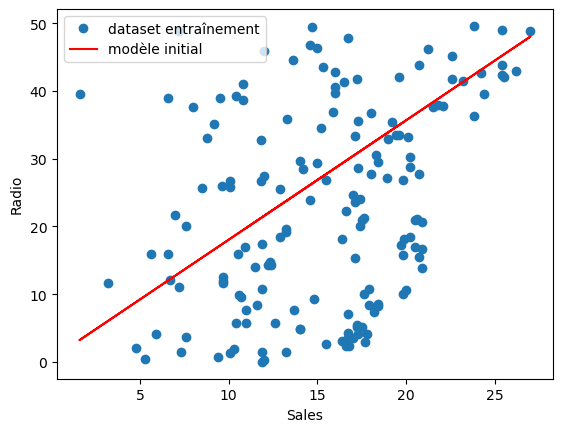

In [340]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.legend()
plt.show()

In [341]:
def cost_function_radio(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [342]:
cost_function_radio(X_train, y_train, theta)

114.93543084929439

In [343]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) 
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function_radio(X, y, theta)
        
    return theta, cost_history

In [344]:
n_iterations = 1000000
learning_rate = 0.00009


theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
cost_history

array([114.19425746, 113.48771769, 112.81419308, ...,  96.16460578,
        96.16460578,  96.16460578])

In [345]:
theta_final

array([[0.97541097],
       [7.92188598]])

In [346]:
theta_final[0]

array([0.97541097])

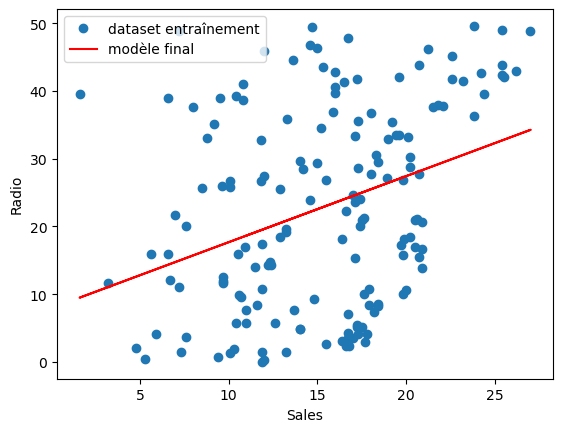

In [347]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.legend()
plt.show()

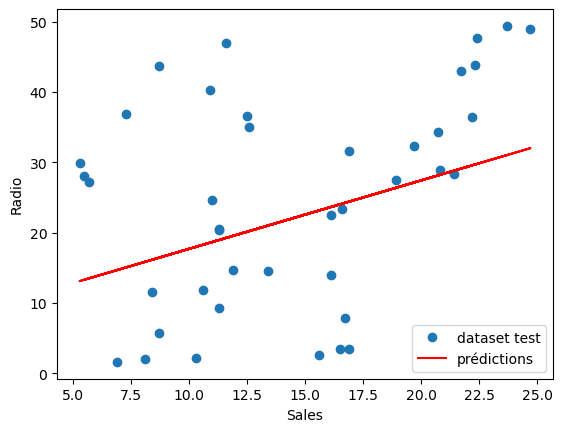

In [348]:
predictions = model(X_test, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.legend()
plt.show()

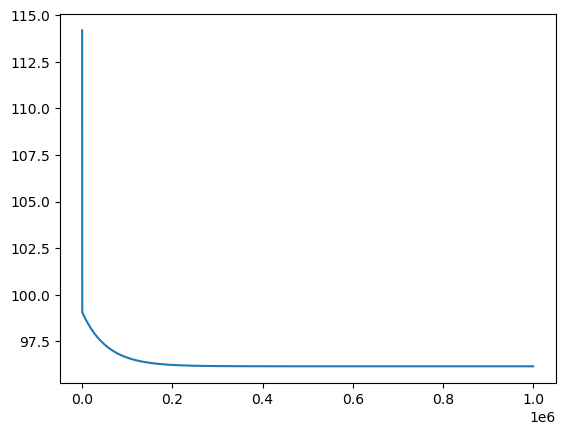

In [349]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [350]:
def coef_determination_radio(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [351]:
cf_radio=coef_determination_radio(y_test, predictions)
print(cf_radio)

0.12300692430165705


# Newspaper

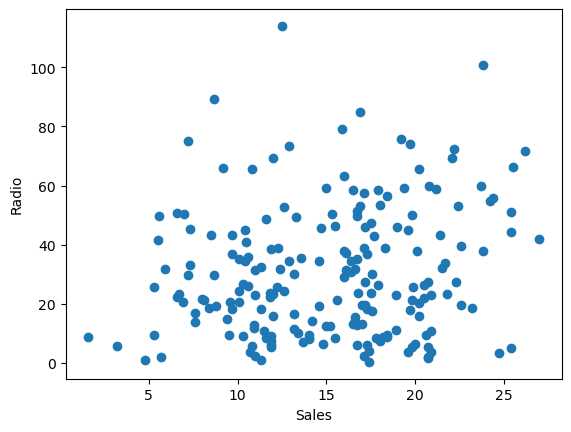

In [353]:
plt.plot(dataset["Sales"],dataset["Newspaper"],'o')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.show()

In [354]:
df=dataset[['Sales','Newspaper']]
df

,Sales,Newspaper
0,22.1,69.2
1,10.4,45.1
2,12.0,69.3
3,16.5,58.5
4,17.9,58.4
...,...,...
195,7.6,13.8
196,14.0,8.1
197,14.8,6.4
198,25.5,66.2


In [355]:
x=dataset.Sales
y=dataset.Newspaper

In [356]:
x=dataset.Sales.values.reshape(200,1)
y=dataset.Newspaper.values.reshape(200,1)

In [357]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [358]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [359]:
X_train=np.hstack((x_train,(np.ones(x_train.shape))))
X_test=np.hstack((x_test,(np.ones(x_test.shape))))

In [360]:
np.random.seed(0)
theta = np.random.randn(2,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]]


In [361]:
def model(X, theta):
    return X.dot(theta)

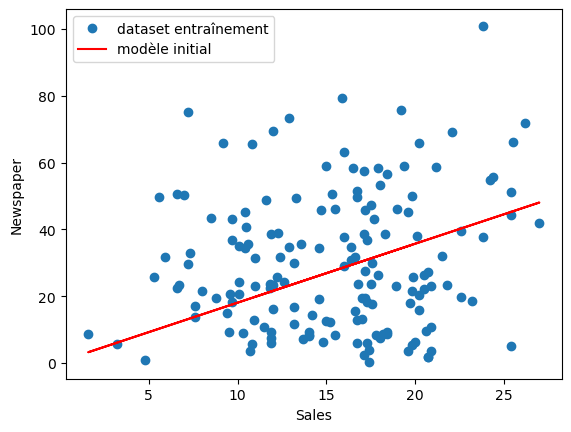

In [362]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta), c='r',label='modèle initial')
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.legend()
plt.show()

In [363]:
def cost_function_np(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [364]:
cost_function_np(X_train, y_train, theta)

223.36853076712273

In [365]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [366]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) 
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function_np(X, y, theta)
        
    return theta, cost_history

In [367]:
n_iterations = 1000000
learning_rate = 0.00003


theta_final, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, n_iterations)
cost_history

array([223.36713784, 223.36576465, 223.3644109 , ..., 201.18686321,
       201.18686292, 201.18686262])

In [368]:
theta_final

array([[ 0.62722246],
       [20.23042704]])

In [369]:
theta_final[0]

array([0.62722246])

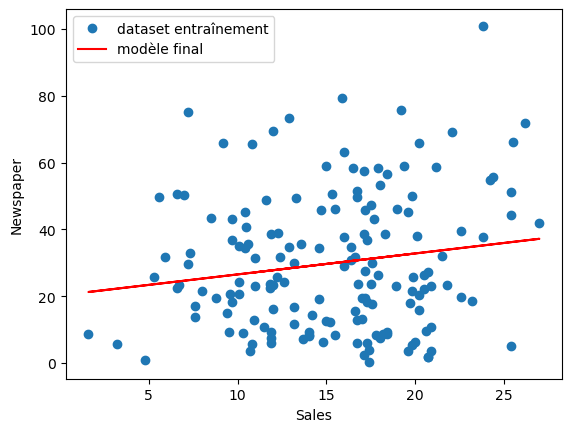

In [370]:
plt.plot(x_train,y_train,'o',label='dataset entraînement')
plt.plot(x_train, model(X_train, theta_final), c='r',label='modèle final')
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.legend()
plt.show()

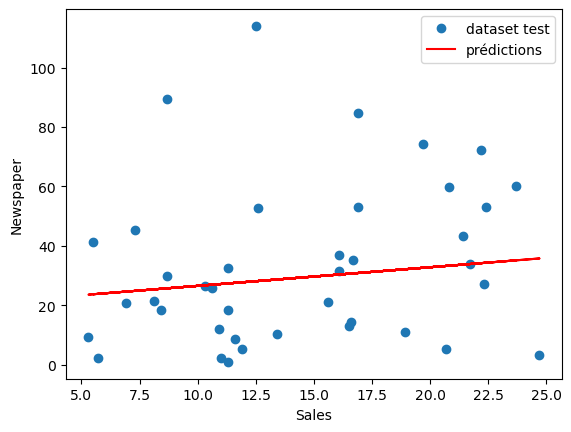

In [371]:
predictions = model(X_test, theta_final)

plt.plot(x_test,y_test,'o',label='dataset test')
plt.plot(x_test,predictions , c='r',label='prédictions')
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.legend()
plt.show()

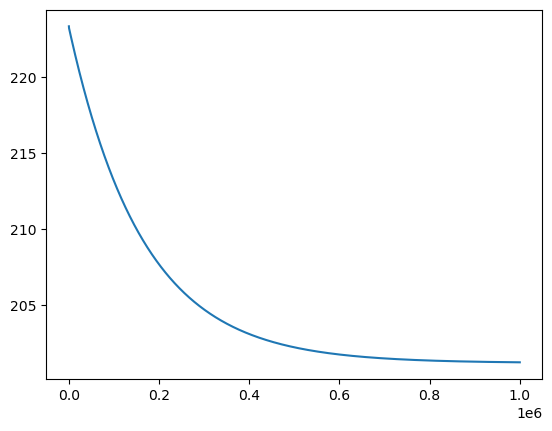

In [372]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [373]:
def coef_determination_np(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [374]:
cf_np=coef_determination_np(y_test, predictions) 
print(cf_np)

0.019020388686800893


# Comparaison

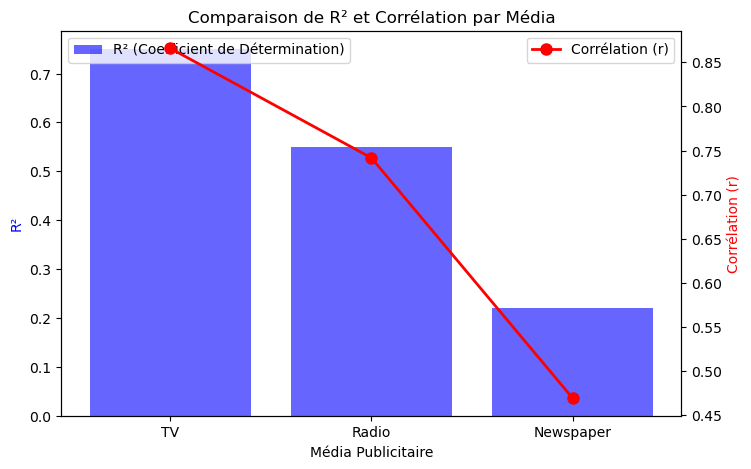

In [376]:
import numpy as np
import matplotlib.pyplot as plt

# Données (exemple)
categories = ["TV", "Radio", "Newspaper"]
r2_scores = [cf_tv, cf_radio, cf_np]  # Exemples de coefficients de détermination
correlation_values = [np.sqrt(r2) for r2 in r2_scores]  # Corrélation = sqrt(R²)

# Création du graphique
fig, ax1 = plt.subplots(figsize=(8, 5))

# Barres pour R²
ax1.bar(categories, r2_scores, color='b', alpha=0.6, label="R² (Coefficient de Détermination)")

# Deuxième axe pour la corrélation
ax2 = ax1.twinx()
ax2.plot(categories, correlation_values, color='r', marker='o', linestyle='-', linewidth=2, markersize=8, label="Corrélation (r)")

# Labels et titres
ax1.set_xlabel("Média Publicitaire")
ax1.set_ylabel("R²", color='b')
ax2.set_ylabel("Corrélation (r)", color='r')
ax1.set_title("Comparaison de R² et Corrélation par Média")

# Légendes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()
